In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro, mannwhitneyu
import scikit_posthocs as sp


%load_ext autoreload
%autoreload 2



share_file = 'ridesharing.csv'
hail_file = 'ridehailing.csv'



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
f_rates = pd.DataFrame()

for file in [share_file, hail_file]:

    df = pd.read_csv(file)
    df = df.dropna(subset="dropoff_time") # drop car agents


    fulfilled = df[df["dropoff_time"] != -1] # passengers whose requests were fulfilled
    unique_fulfilled = fulfilled.drop_duplicates(subset=['seed_int', 'iteration', 'num_drivers', 'strategy', 'AgentID'], keep='last')

    unique_df = df.drop_duplicates(subset=['seed_int', 'iteration', 'num_drivers', 'strategy', 'AgentID'], keep='last')


    for strategy in ["StepType.CLOSEST", "StepType.QUEUE", "StepType.WAITING"]:
        for i in range(1,6):

            num_fulfilled = len(unique_fulfilled[(unique_fulfilled["strategy"] == strategy) & (unique_fulfilled["num_drivers"] == i)])

            total = len(unique_df[(unique_df["strategy"] == strategy) & (unique_df["num_drivers"] == i)])

            f_rate = (num_fulfilled/total) * 100

            f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'file': file}, ignore_index=True)


f_rates


C:\Users\lokhe\AppData\Local\Temp\ipykernel_5180\4231089168.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'file': file}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_5180\4231089168.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'file': file}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_5180\4231089168.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'file': file}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipyker

,Strategy,num_drivers,f_rate,file
0,StepType.CLOSEST,1,54.717241,ridesharing.csv
1,StepType.CLOSEST,2,85.753425,ridesharing.csv
2,StepType.CLOSEST,3,91.727891,ridesharing.csv
3,StepType.CLOSEST,4,91.891892,ridesharing.csv
4,StepType.CLOSEST,5,91.785235,ridesharing.csv
5,StepType.QUEUE,1,53.944828,ridesharing.csv
6,StepType.QUEUE,2,85.287671,ridesharing.csv
7,StepType.QUEUE,3,91.646259,ridesharing.csv
8,StepType.QUEUE,4,91.837838,ridesharing.csv
9,StepType.QUEUE,5,91.503356,ridesharing.csv


C:\Users\lokhe\AppData\Local\Temp\ipykernel_5180\3269335276.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (n, type) in enumerate(groups):
C:\Users\lokhe\AppData\Local\Temp\ipykernel_5180\3269335276.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in types:
C:\Users\lokhe\AppData\Local\Temp\ipykernel_5180\3269335276.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in types:
C:\Users\lokhe\AppData\Local\Temp\ipykernel_5180

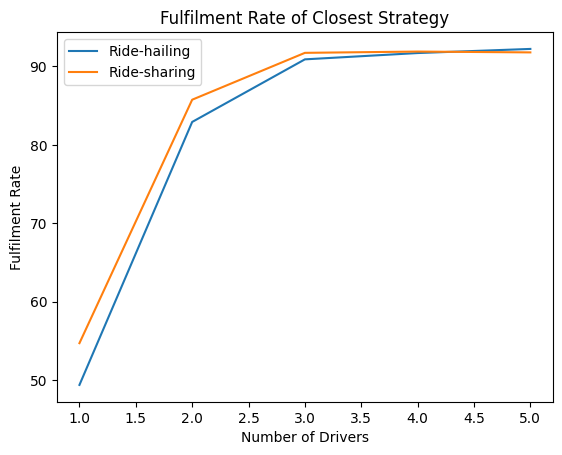

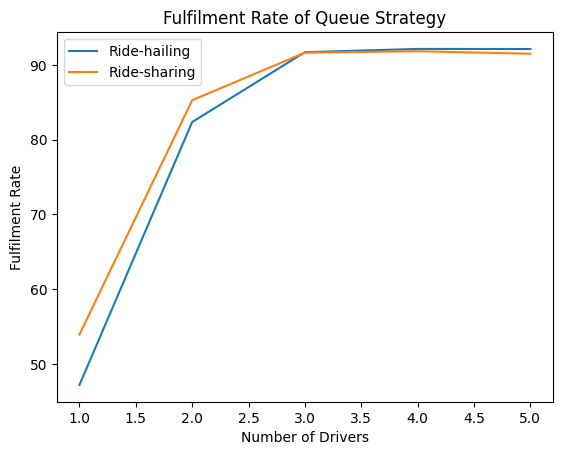

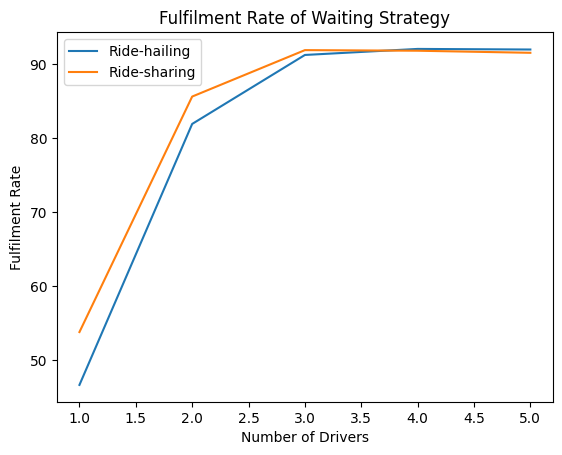

In [25]:
groups = (f_rates.groupby(['Strategy']))
strats = ['Closest', 'Queue', 'Waiting']
files = ['Ride-hailing', 'Ride-sharing']

for i, (n, type) in enumerate(groups):
    fig, ax = plt.subplots()
    types = (type.groupby(['file']))

    for name, group in types:

        ax.plot(group['num_drivers'], group['f_rate'], label=name)

        ax.legend()

        ax.set_xlabel('Number of Drivers')
        ax.set_ylabel(f'Fulfilment Rate')
        ax.set_title(f'Fulfilment Rate of {strats[i]} Strategy')

        plt.legend(files)

    plt.savefig(f'figures/f_rate{strats[i]}.png')


## stats testing

In [21]:
f_rates_norm = pd.DataFrame(columns=['Strategy', 'num_drivers', 'Iteration', 'Seed_int', 'f_rate', 'file'])

for file in [share_file, hail_file]:

    for strategy in ["StepType.CLOSEST", "StepType.QUEUE", "StepType.WAITING"]:

        df = pd.read_csv(file)
        df = df.dropna(subset="dropoff_time") # drop car agents


        fulfilled = df[df["dropoff_time"] != -1] # passengers whose requests were fulfilled
        unique_fulfilled = fulfilled.drop_duplicates(subset=['seed_int', 'iteration', 'num_drivers', 'strategy', 'AgentID'], keep='last')

        unique_df = df.drop_duplicates(subset=['seed_int', 'iteration', 'num_drivers', 'strategy', 'AgentID'], keep='last')

        for i in range(1,6):
            for seed_int in unique_df['seed_int'].unique():
                for iteration in unique_df['iteration'].unique():
                    num_fulfilled = len(unique_fulfilled[(unique_fulfilled["strategy"] == strategy) & (unique_fulfilled["num_drivers"] == i) & (unique_fulfilled['seed_int'] == seed_int) & (unique_fulfilled['iteration'] == iteration)])
                    total = len(unique_df[(unique_df["strategy"] == strategy) & (unique_df["num_drivers"] == i) & (unique_df['seed_int'] == seed_int) & (unique_df['iteration'] == iteration)])
                    f_rate = (num_fulfilled/total) * 100
                    f_rates_norm.loc[len(f_rates_norm)] = {'Strategy': strategy, 'num_drivers': i, 'Iteration': iteration, 'Seed_int': seed_int, 'f_rate': f_rate, 'file': file}



display(f_rates_norm[f_rates_norm["num_drivers"]==3])
# unique_fulfilled

,Strategy,num_drivers,Iteration,Seed_int,f_rate,file
100,StepType.CLOSEST,3,0,54,92.517007,ridesharing.csv
101,StepType.CLOSEST,3,1,54,91.836735,ridesharing.csv
102,StepType.CLOSEST,3,2,54,91.156463,ridesharing.csv
103,StepType.CLOSEST,3,3,54,91.156463,ridesharing.csv
104,StepType.CLOSEST,3,4,54,89.795918,ridesharing.csv
...,...,...,...,...,...,...
1395,StepType.WAITING,3,0,578,93.197279,ridehailing.csv
1396,StepType.WAITING,3,1,578,91.156463,ridehailing.csv
1397,StepType.WAITING,3,2,578,95.918367,ridehailing.csv
1398,StepType.WAITING,3,3,578,87.755102,ridehailing.csv


In [7]:
# the null hypothesis of the test is that the data is drawn from a normal distribution.
# If the p-value is less than some predetermined significance level (e.g., 0.05), 
# we would reject the null hypothesis and conclude that the data is not normally distributed.
for file in [share_file, hail_file]:

    for strategy in ["StepType.CLOSEST", "StepType.QUEUE", "StepType.WAITING"]:
        for i in range(1,6):
            group = f_rates_norm[(f_rates_norm["Strategy"] == strategy) & (f_rates_norm["num_drivers"] == i) & (f_rates_norm["file"] == file)]

            
            stat, p = shapiro(group["f_rate"])

            # Print the test statistic and p-value
            print("Shapiro-Wilk test statistic:", stat)
            print("p-value:", p)
            if p < 0.05:
                print("Reject", strategy, i, file)

Shapiro-Wilk test statistic: 0.9597750306129456
p-value: 0.08698394149541855
Shapiro-Wilk test statistic: 0.9866739511489868
p-value: 0.8404966592788696
Shapiro-Wilk test statistic: 0.9743865728378296
p-value: 0.34569960832595825
Shapiro-Wilk test statistic: 0.9485084414482117
p-value: 0.02963564544916153
Reject StepType.CLOSEST 4 ridesharing.csv
Shapiro-Wilk test statistic: 0.9730544686317444
p-value: 0.30675071477890015
Shapiro-Wilk test statistic: 0.9482938051223755
p-value: 0.029043138027191162
Reject StepType.QUEUE 1 ridesharing.csv
Shapiro-Wilk test statistic: 0.9543328285217285
p-value: 0.051532018929719925
Shapiro-Wilk test statistic: 0.9728498458862305
p-value: 0.30110758543014526
Shapiro-Wilk test statistic: 0.9805821180343628
p-value: 0.5767629146575928
Shapiro-Wilk test statistic: 0.978489339351654
p-value: 0.49016034603118896
Shapiro-Wilk test statistic: 0.9744614362716675
p-value: 0.3480050563812256
Shapiro-Wilk test statistic: 0.9735223650932312
p-value: 0.31999126076698

In [23]:
# not normal, so use mann whitney u test 

for i in range(1,6):
    for strat in ["StepType.CLOSEST", "StepType.QUEUE", "StepType.WAITING"]:
        group1 = f_rates_norm[(f_rates_norm["Strategy"] == strat ) & (f_rates_norm["num_drivers"] == i) & (f_rates_norm["file"] ==  'ridesharing.csv')]['f_rate']
        group2 = f_rates_norm[(f_rates_norm["Strategy"] == strat) & (f_rates_norm["num_drivers"] == i) & (f_rates_norm["file"] ==  'ridehailing.csv')]['f_rate']
        # print(group1)


        stat, p = mannwhitneyu(group1, group2, alternative='greater')
        # print("Mann-Whitney U test statistic:", stat)
        # print("p-value:", p)

        # print('Statistics=%.3f, p=%f' % (stat, p))
        print('Statistics=%.3f' % (p), i, strat)


        
        # alpha = 0.05
        # if p > alpha:
        #     print('Samples look to be drawn from the same distributions (fail to reject H0)')
        # else:
        #     print('Samples look to be drawn from different distributions (reject H0)')

Statistics=0.000 1 StepType.CLOSEST
Statistics=0.000 1 StepType.QUEUE
Statistics=0.000 1 StepType.WAITING
Statistics=0.000 2 StepType.CLOSEST
Statistics=0.000 2 StepType.QUEUE
Statistics=0.000 2 StepType.WAITING
Statistics=0.026 3 StepType.CLOSEST
Statistics=0.481 3 StepType.QUEUE
Statistics=0.045 3 StepType.WAITING
Statistics=0.629 4 StepType.CLOSEST
Statistics=0.781 4 StepType.QUEUE
Statistics=0.609 4 StepType.WAITING
Statistics=0.920 5 StepType.CLOSEST
Statistics=0.937 5 StepType.QUEUE
Statistics=0.858 5 StepType.WAITING
